# HOUSE PRICING ANALYSIS

## INTRODUCTION

I have been tasked with analyzing the data of houses in King County. My goal is to make predictions about the sale price 
of houses based on certain variables or features,so that they can be used to make profitable decisions by a housing 
development company. This project provides actionable insights with respect to what kind of home renovations the home 
owners might make with the goal of maximizing the sale price of their home.

## BUSINESS UNDERSTANDING

There are many King County residents that have decided to sell their homes and want to renovate their home to increase its
resale value because the housing market has become an hot cake. However, the home owners don't know what factors 
are important for determining a home's value and require information to inform them on what renovations to make. Using home 
sale price and other housing data from King County, I  will identify which potential renovations would best maximize home sale 
price.

## DATA UNDERSTANDING

The data represents a number of home characteristics including square footage, number of floors, number of bedrooms,
home grade and condition, and various other variables of King County from the years 2014-2015.
The target variable of the analysis is home price. 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
#Loading data
house_data = pd.read_csv('kc_house_data.csv')
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#checking the information contained in the dataframe
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#Display some sample statistics and look for outliers 

desc_df = house_data.describe()

#add std metric at the bottom to look for outliers that 3 stds away from the mean
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

desc_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
+3_std,1.321068e+10,1.642401e+06,6.152097,4.422779,4834.640225,1.393373e+05,3.113145,0.268070,2.530921,5.361462,11.177514,4271.876126,2059.125378,1283.476020,98238.491062,47.975748,-121.791812,4042.311733,94581.609363
-3_std,-4.049733e+09,-5.618078e+05,0.594303,-0.191127,-673.996525,-1.091385e+05,-0.124952,-0.252879,-2.063196,1.458189,4.138316,-694.682441,1882.873973,-1116.202463,97917.412628,47.144438,-122.636153,-69.071098,-69065.042340


In [5]:
#missing values in water front
house_data.waterfront.value_counts(normalize=True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

In [6]:
#Look for null values in each column
house_data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

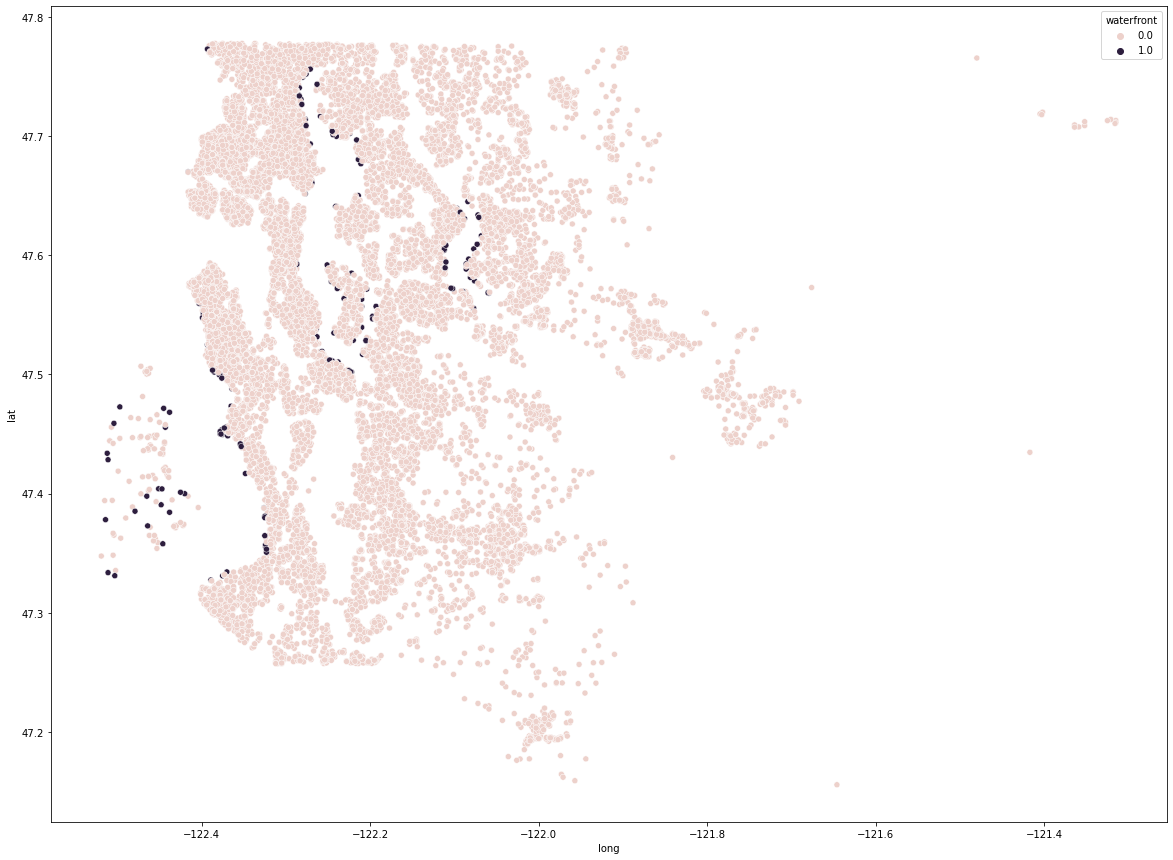

In [7]:
#checking out houses around the water front
plt.figure(figsize=(20, 15))
sns.scatterplot(x = "long", y = "lat", hue = "waterfront",  data = house_data)

Under 1% of houses have a waterfront. Most do not. There are 2376 missing values

# DATA PREPARATION

After obtaining my dataset, I cleaned the data by addressing null values, standardizing data types, removing duplicate 
values, removing unnecessary columns, and creating a was_renovated categorical variable. Specifically, I dropped the lat
and long variables and I did not find them relevant to the analysis, and I filled in the null values for view, waterfront, 
and sqft_basement with the mode value for those columns.

In [8]:
#Check for duplicated IDs 
duplicated_ids = house_data.duplicated(subset=['id'], keep=False)
duplicated_ids.value_counts()

False    21244
True       353
dtype: int64

In [9]:
# Exploring the dataset

house_data[house_data.duplicated(keep = False, subset = ['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,7/25/2014,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,9/5/2014,232000.0,2,1.00,1240,12092,1.0,NaN,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,6/26/2014,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,10/3/2014,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


In [10]:
# Transform the 'yr_renovated' column into a boolean 'was_renovated' feature
# to better capture the effects of renovation on price

house_data['yr_renovated'].fillna(0, inplace=True)
(house_data['yr_renovated'] > 0).astype(int)
house_data['was_renovated'] = (house_data['yr_renovated'] > 0).astype(int)
house_data['was_renovated'].value_counts()

0    20853
1      744
Name: was_renovated, dtype: int64

In [11]:
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,was_renovated
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0


A home's latitude and longitude will not be particularly relevant for prospective homebuyers. Neither will its id, or the
date, as other data, such as yr_built, will be of much more interest. As a result, we will drop these variables, as they
do not make much sense in the context of our business problem.

In [12]:
#removing unnecessary columns

house_data.drop(['id', 'date', 'yr_renovated', 'lat', 'long'], axis = 1, inplace = True)
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,98178,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,98125,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,98028,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,98136,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,98074,1800,7503,0


In [13]:
#Check for null or missing values

house_data.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
sqft_living15       0
sqft_lot15          0
was_renovated       0
dtype: int64

In [14]:
# Determine most common value for 'view' and 'waterfront' features

display(house_data['view'].value_counts())
house_data['waterfront'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [15]:
# Fill in missing values for 'view' and 'waterfront' with the most common value

house_data['view'].fillna(0, inplace=True)
house_data['waterfront'].fillna(0, inplace=True)
house_data.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
sqft_living15    0
sqft_lot15       0
was_renovated    0
dtype: int64

In [16]:
# checking the datatypes

house_data.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
zipcode            int64
sqft_living15      int64
sqft_lot15         int64
was_renovated      int32
dtype: object

In [17]:
house_data['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [18]:
# Fill in null values for 'sqft_basement with zeroes as its possible that
# those homes did not have basements.'

house_data['sqft_basement'].replace('?', 0.0, inplace=True)

In [19]:
house_data['sqft_basement'].astype(str)
house_data['sqft_basement'].dtypes

dtype('O')

In [20]:
house_data['sqft_basement'].value_counts()

0.0       12826
0.0         454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [21]:
#changing sqft basement to a float
house_data['sqft_basement'] = house_data['sqft_basement'].astype(float)

In [22]:
# Recast 'sqft_basement' data type to int

house_data['sqft_basement'] = house_data['sqft_basement'].astype(int)
house_data['sqft_basement'].value_counts()

0       13280
600       217
500       209
700       208
800       201
        ...  
1920        1
3480        1
2730        1
2720        1
248         1
Name: sqft_basement, Length: 303, dtype: int64

In [23]:
# Display dataframe information

display(house_data.head())
display(house_data.info())
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0,1955,98178,1340,5650,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400,1951,98125,1690,7639,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0,1933,98028,2720,8062,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910,1965,98136,1360,5000,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0,1987,98074,1800,7503,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   view           21597 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int32  
 12  yr_built       21597 non-null  int64  
 13  zipcode        21597 non-null  int64  
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  was_renovated  21597 non-null  int32  
dtypes: float64(5), int32(2), int64(10)
memory usage: 2

None

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,98077.951845,1986.620318,12758.283512,0.034449
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,53.513072,685.230472,27274.441950,0.182384
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,98001.000000,399.000000,651.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,98033.000000,1490.000000,5100.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,98065.000000,1840.000000,7620.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,98118.000000,2360.000000,10083.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,98199.000000,6210.000000,871200.000000,1.000000


### checking the linearity and correlation of the variables

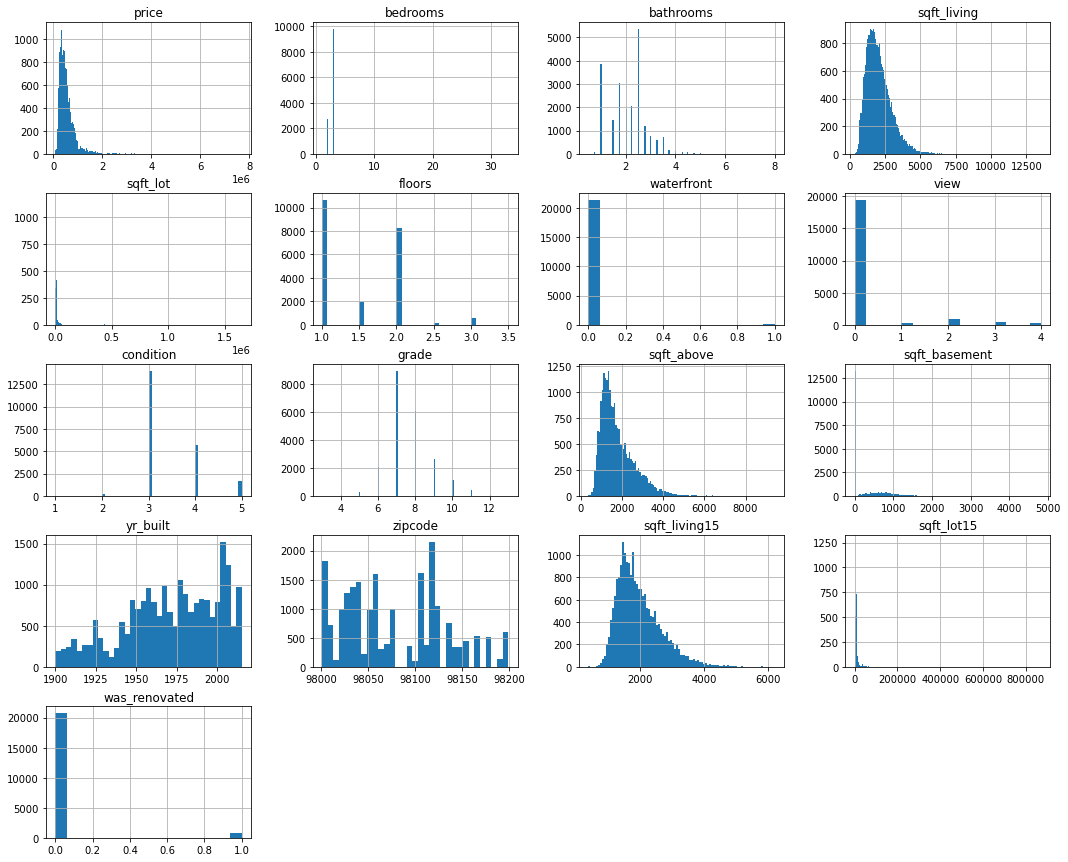

In [24]:
#plotting histograms to check on the distribution of the variables
house_data.hist(figsize=(18,15), bins='auto');

bathrooms, bedrooms, condition, floors, grade, view, waterfront, and yr_renovated are categorical. The remaining 
variables seem to be continuous. scatter plots can help us explore this further.

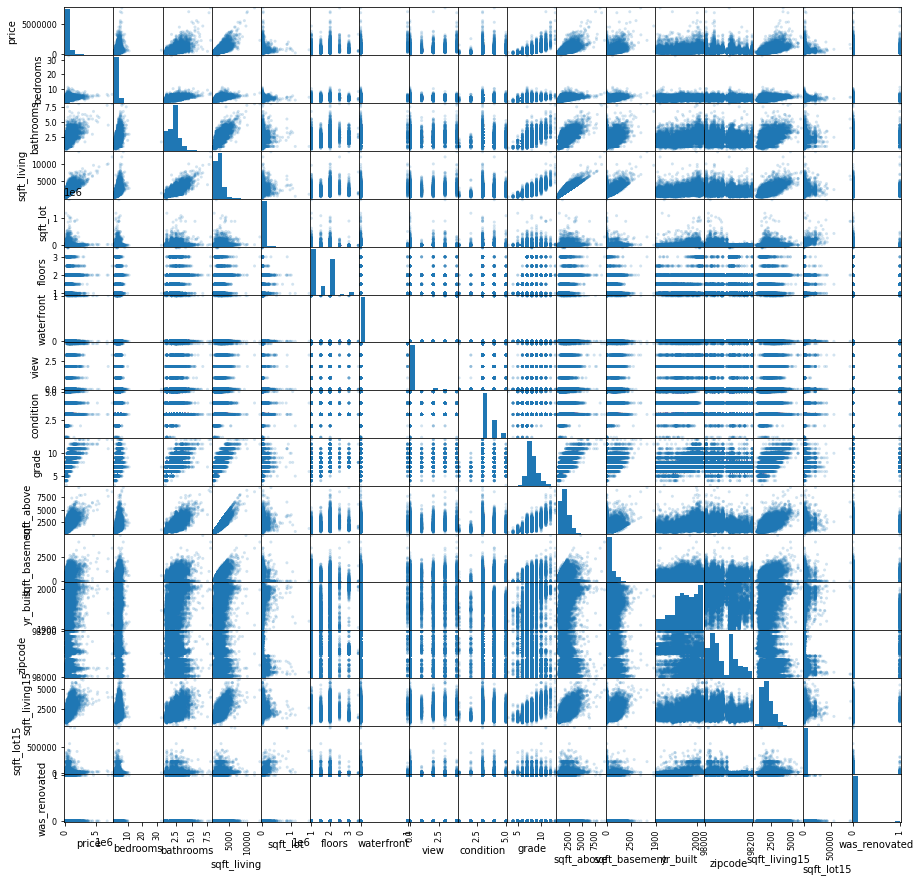

In [25]:
# Check for linearity between predictors and price

pd.plotting.scatter_matrix(house_data, alpha=0.2, figsize=(15, 15))
plt.show()

many of the variables do not appear to be normally distributed

In [26]:
# Check for mulitcollinearity using correlation heatmap

correlations = house_data.drop('price', axis=1).corr()
correlations.round(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
bedrooms,1.00,0.51,0.58,0.03,0.18,-0.00,0.08,0.03,0.36,0.48,0.30,0.16,-0.15,0.39,0.03,0.02
bathrooms,0.51,1.00,0.76,0.09,0.50,0.06,0.19,-0.13,0.67,0.69,0.28,0.51,-0.20,0.57,0.09,0.05
sqft_living,0.58,0.76,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.43,0.32,-0.20,0.76,0.18,0.05
sqft_lot,0.03,0.09,0.17,1.00,-0.00,0.02,0.08,-0.01,0.11,0.18,0.02,0.05,-0.13,0.14,0.72,0.01
floors,0.18,0.50,0.35,-0.00,1.00,0.02,0.03,-0.26,0.46,0.52,-0.24,0.49,-0.06,0.28,-0.01,0.00
waterfront,-0.00,0.06,0.10,0.02,0.02,1.00,0.38,0.02,0.08,0.07,0.08,-0.02,0.03,0.08,0.03,0.07
view,0.08,0.19,0.28,0.08,0.03,0.38,1.00,0.05,0.25,0.17,0.27,-0.05,0.09,0.28,0.07,0.09
condition,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.15,-0.16,0.17,-0.36,0.00,-0.09,-0.00,-0.06
grade,0.36,0.67,0.76,0.11,0.46,0.08,0.25,-0.15,1.00,0.76,0.17,0.45,-0.19,0.71,0.12,0.02
sqft_above,0.48,0.69,0.88,0.18,0.52,0.07,0.17,-0.16,0.76,1.00,-0.05,0.42,-0.26,0.73,0.20,0.02


<AxesSubplot:>

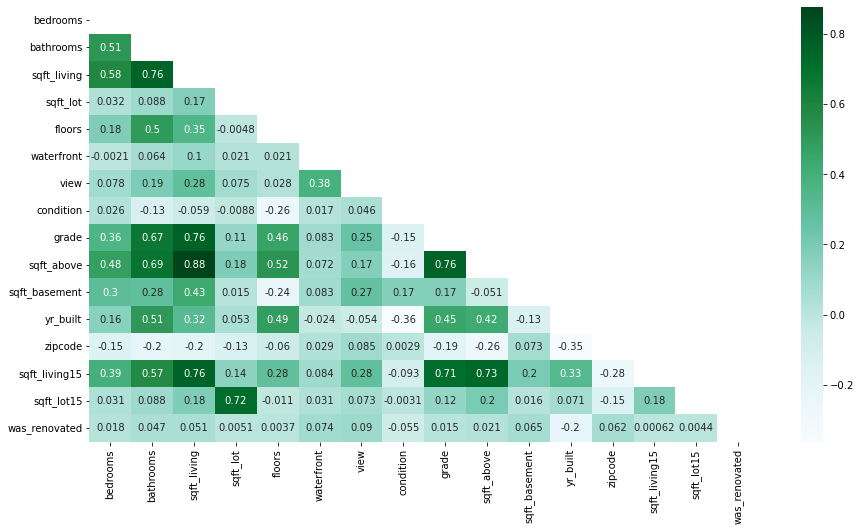

In [27]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,8))
sns.heatmap(correlations, annot=True, cmap='BuGn', mask=mask, ax=ax)

In [28]:
#checking which variables are highly correlated with our  price.
house_data.corr()[abs(house_data.corr()['price']) > 0.3]

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,was_renovated
price,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.264306,0.393497,0.036056,0.667951,0.605368,0.321108,0.053953,-0.053402,0.585241,0.082845,0.117543
bedrooms,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002127,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,-0.154092,0.393406,0.030690,0.017635
bathrooms,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063629,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,-0.204786,0.569884,0.088303,0.046742
sqft_living,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.104637,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,-0.199802,0.756402,0.184342,0.050829
view,0.393497,0.078354,0.186016,0.281715,0.075054,0.028414,0.380543,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.085059,0.278928,0.073083,0.090480
grade,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.082818,0.249082,-0.146896,1.000000,0.756073,0.165843,0.447865,-0.185771,0.713867,0.120981,0.015259
sqft_above,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,0.071778,0.166017,-0.158904,0.756073,1.000000,-0.051175,0.424037,-0.261570,0.731767,0.195077,0.020566
sqft_basement,0.321108,0.297229,0.278485,0.428660,0.015031,-0.241866,0.083050,0.270629,0.168482,0.165843,-0.051175,1.000000,-0.130085,0.073271,0.199288,0.015885,0.064675
sqft_living15,0.585241,0.393406,0.569884,0.756402,0.144763,0.280102,0.083823,0.278928,-0.093072,0.713867,0.731767,0.199288,0.326377,-0.279299,1.000000,0.183515,0.000622


In [29]:
#checking if variables are correlated to each other
df2 = house_data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df2['pairs'] = list(zip(df2.level_0, df2.level_1))

df2.set_index(['pairs'], inplace = True)

df2.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df2.columns = ['cc']

df2.drop_duplicates(inplace=True)

df2[(df2.cc>.75) & (df2.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(grade, sqft_living)",0.762779
"(sqft_living, sqft_living15)",0.756402
"(grade, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758


Most variables are correlated to each other we will consider dropping variables that are highly correlated with one another 
in order to prevent multicollinearity in our model.

In [30]:
#droping variables
house_data_model = house_data.drop(columns = ['yr_built','sqft_above','sqft_basement','sqft_living15', 'sqft_lot15', 'grade'])
house_data_model.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,was_renovated
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,98178,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,98125,1
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,98028,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,98136,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,98074,0


### Outliers analysis

<AxesSubplot:xlabel='bedrooms'>

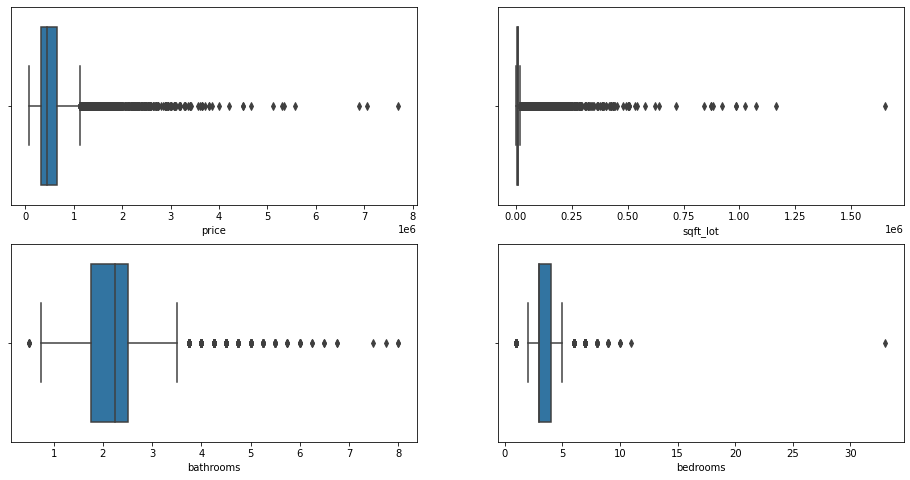

In [31]:
#Create boxplots to identify outliers
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.boxplot(x=house_data['price'])
plt.subplot(222)
sns.boxplot(x=house_data['sqft_lot'])
plt.subplot(223)
sns.boxplot(x=house_data['bathrooms'])
plt.subplot(224)
sns.boxplot(x=house_data['bedrooms'])

Bedrooms,price and sqft lot have outliers which need to be eliminated

# MODELING

## Baseline Model

In this analysis, i created several multiple linear regression models with an aim of predicting house prices and identify 
the variables that affect the price.For the R squared value to increase, i normalized the data by use of log,removed outliers and encoded zipcode as a categorical variable.

In [32]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.regression.linear_model import OLS

In [33]:
# Creating a model
house_predictors = house_data_model.drop('price', axis=1)
house_target = house_data_model['price']

# Use sm.add_constant() to add constant term
predictors = sm.add_constant(house_predictors)
predictors

,const,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,zipcode,was_renovated
0,1.0,3,1.00,1180,5650,1.0,0.0,0.0,3,98178,0
1,1.0,3,2.25,2570,7242,2.0,0.0,0.0,3,98125,1
2,1.0,2,1.00,770,10000,1.0,0.0,0.0,3,98028,0
3,1.0,4,3.00,1960,5000,1.0,0.0,0.0,5,98136,0
4,1.0,3,2.00,1680,8080,1.0,0.0,0.0,3,98074,0
...,...,...,...,...,...,...,...,...,...,...,...
21592,1.0,3,2.50,1530,1131,3.0,0.0,0.0,3,98103,0
21593,1.0,4,2.50,2310,5813,2.0,0.0,0.0,3,98146,0
21594,1.0,2,0.75,1020,1350,2.0,0.0,0.0,3,98144,0
21595,1.0,3,2.50,1600,2388,2.0,0.0,0.0,3,98027,0


In [34]:
model = sm.OLS(house_target, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2910.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:11:31   Log-Likelihood:            -2.9817e+05
No. Observations:               21597   AIC:                         5.964e+05
Df Residuals:                   21586   BIC:                         5.965e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -3.51e+07   3.13e+06    -11.216      0.000   -4.12e+07    -2.9e+07
bedrooms      -4.978e+04   2222.635    -22.397      0.000   -5.41e+04   -4.54e+04
bathrooms      1.176e+04   3584.096      3.281      0.001    4733.392    1.88e+04
sqft_living     284.2213      3.023     94.030      0.000     278.297     290.146
sqft_lot         -0.3295      0.041     -8.130      0.000      -0.409      -0.250
floors          2.37e+04   3630.989      6.528      0.000    1.66e+04    3.08e+04
waterfront     5.751e+05   2.16e+04     26.655      0.000    5.33e+05    6.17e+05
view           6.608e+04   2440.543     27.076      0.000    6.13e+04    7.09e+04
condition      4.996e+04   2619.944     19.070      0.000    4.48e+04    5.51e+04
zipcode         356.4946     31.894     11.178      0.000     293.980     419.009
was_renovated  1.254e+05   9034.371     13.879      0.000    1.08e+05    1.43e+05
==============================================================================
Omnibus:                    13312.321   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           461676.159
Skew:                           2.418   Prob(JB):                         0.00
Kurtosis:                      25.128   Cond. No.                     1.91e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


our model has a problem we need to create a new model to solve the problems


In [35]:
# creating a model function and diagnosis

def create_ols_model(data, target='price', plot_results=True):
    
    house_predictors = data.drop(target, axis=1).copy()
    house_target = data[target].copy()

    #Use sm.add_constant() to add constant term/y-intercept
    predictors = sm.add_constant(house_predictors)
    predictors

    model = sm.OLS(house_target, predictors).fit()
    display(model.summary())
    
    if plot_results == True:
        qqplot_and_resids(model, predictors)
    
    return model

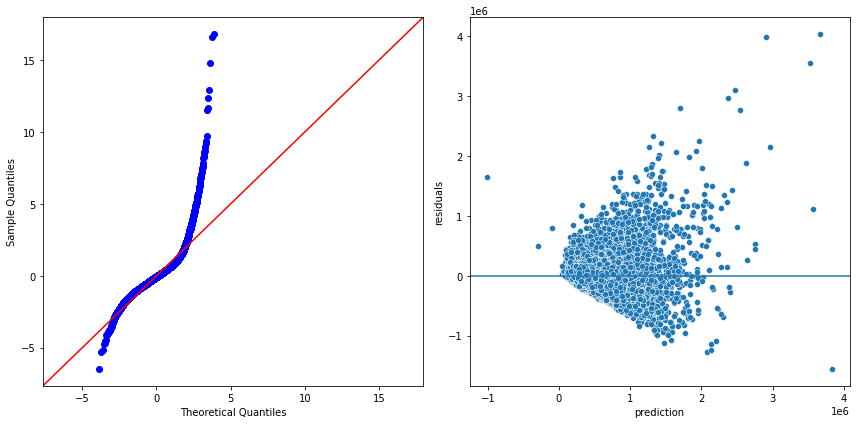

In [36]:
#Function to check normality and homoskedasticity using qqplots and residuals

def qqplot_and_resids (model, predictors, figsize = (12,6)):
    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize = figsize)

    sm.graphics.qqplot(model.resid,line='45',fit=True, ax=ax[0]);
    y_hat = model.predict(predictors)
    sns.scatterplot(x=y_hat, y=model.resid, ax=ax[1])
    ax[1].axhline(0)
    ax[1].set(xlabel= 'prediction', ylabel = 'residuals')
    plt.tight_layout()

qqplot_and_resids(model, predictors)

from the above plots we can see the prediction and residuals have formed a cone shape and the qqplot has a longer upper tail
hence this model has failed to meet the normality and homoskedasticity assumptions of linear regression

## MODEL 2

In our second model we shall try to normalize the data by use of logs

In [37]:
#Let's take a look at our features of our data frame
features = list(house_data_model.columns)
features

['price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'zipcode',
 'was_renovated']

(0.0, 10000.0)

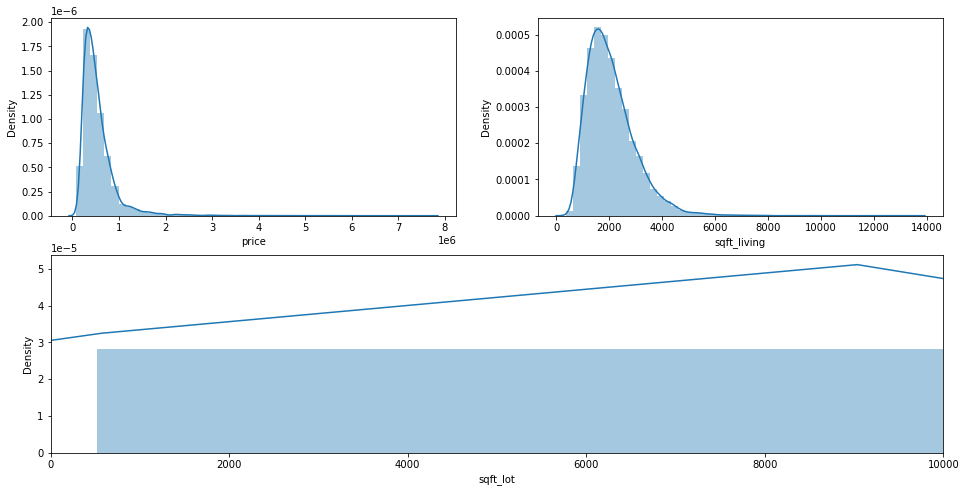

In [38]:
#Exploring distributions of continuous variables
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(house_data_model.price, label='Prices')
plt.subplot(222)
sns.distplot(house_data_model.sqft_living, label='Sqft living')
plt.subplot(212)
sns.distplot(house_data_model.sqft_lot, label='Sqft Lot')
plt.xlim(0, 10000)

Our continuous variables currently don't follow a normal distribution. so logging the variables might improve our heteroscedasticity.

In [39]:
# Convert to logs
price = np.log(house_data_model.price)
sqft_living = np.log(house_data_model.sqft_living)
sqft_lot = np.log(house_data_model.sqft_lot)

<AxesSubplot:xlabel='sqft_lot', ylabel='Density'>

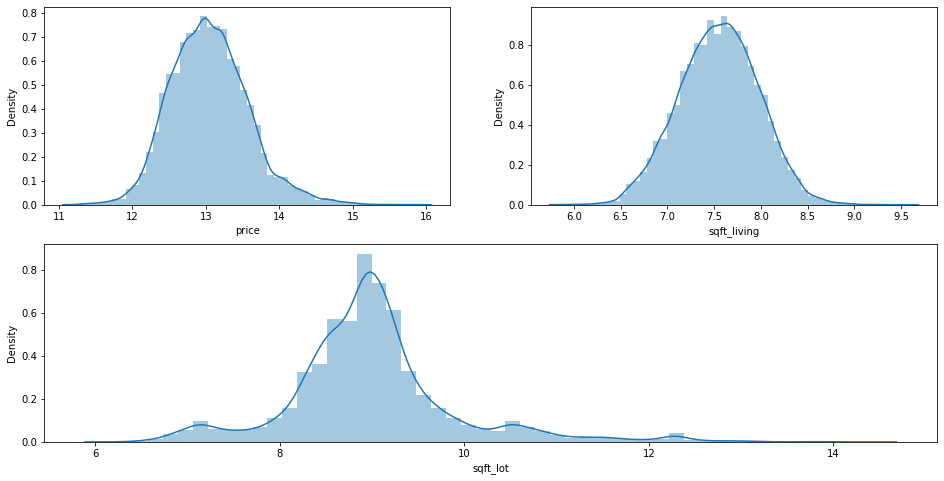

In [40]:
#Comparing the distributions
plt.figure(figsize=(16,8))
plt.subplot(221)
sns.distplot(price, label='Prices')
plt.subplot(222)
sns.distplot(sqft_living, label='Sqft Living')
plt.subplot(212)
sns.distplot(sqft_lot, label='Sqft Lot')

The distributions for sqft_living and sqft_lot definitely look more normal after the log transformation. We also see a 
small improvement in price; however, we won't implement the log transformation on the price to our data frame. We don't 
believe the improvement is significant enough.

In [41]:
#Apply log transformations

house_data_model['sqft_living'] = sqft_living
house_data_model['sqft_lot'] =sqft_lot

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.482
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     2005.
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:11:33   Log-Likelihood:            -3.0030e+05
No. Observations:               21597   AIC:                         6.006e+05
Df Residuals:                   21586   BIC:                         6.007e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.468e+07   3.57e+06     -9.724      0.000   -4.17e+07   -2.77e+07
bedrooms      -3.873e+04   2527.687    -15.321      0.000   -4.37e+04   -3.38e+04
bathrooms      7.236e+04   3970.055     18.226      0.000    6.46e+04    8.01e+04
sqft_living    4.448e+05   7926.266     56.121      0.000    4.29e+05     4.6e+05
sqft_lot      -1.004e+04   2408.739     -4.167      0.000   -1.48e+04   -5315.291
floors         1.349e+04   4267.344      3.161      0.002    5126.081    2.19e+04
waterfront     6.186e+05   2.38e+04     25.964      0.000    5.72e+05    6.65e+05
view           8.823e+04   2671.545     33.027      0.000     8.3e+04    9.35e+04
condition      4.688e+04   2892.019     16.211      0.000    4.12e+04    5.26e+04
zipcode         323.4013     36.280      8.914      0.000     252.290     394.512
was_renovated  1.272e+05   9969.648     12.754      0.000    1.08e+05    1.47e+05
==============================================================================
Omnibus:                    17816.806   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1393194.365
Skew:                           3.478   Prob(JB):                         0.00
Kurtosis:                      41.727   Cond. No.                     1.94e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

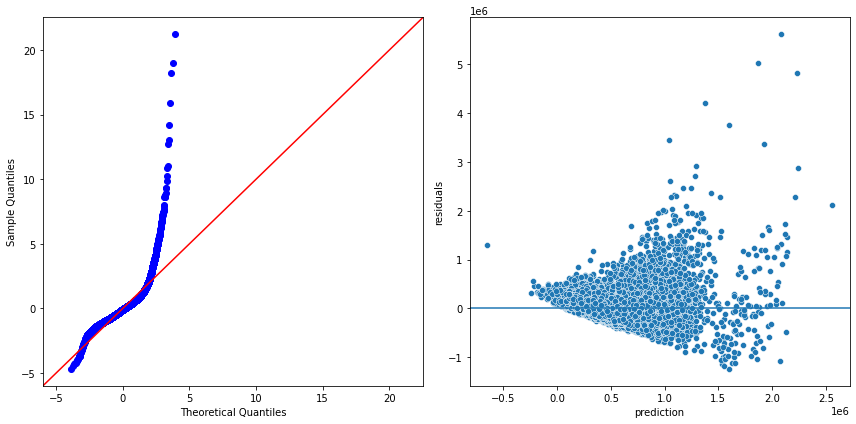

In [42]:
model2 = create_ols_model(house_data_model, target='price', plot_results=True)

### MODEL 3

In [43]:
# Encode 'zipcode' as categorical variable

house_data_model['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [44]:
house_data_model = pd.get_dummies(house_data_model, columns=['zipcode'], drop_first=True)
house_data_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,was_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,7.073270,8.639411,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,7.851661,8.887653,2.0,0.0,0.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,6.646391,9.210340,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,7.580700,8.517193,1.0,0.0,0.0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,7.426549,8.997147,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,7.333023,7.030857,3.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
21593,400000.0,4,2.50,7.745003,8.667852,2.0,0.0,0.0,3,0,...,1,0,0,0,0,0,0,0,0,0
21594,402101.0,2,0.75,6.927558,7.207860,2.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
21595,400000.0,3,2.50,7.377759,7.778211,2.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     767.7
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:11:34   Log-Likelihood:            -2.9302e+05
No. Observations:               21597   AIC:                         5.862e+05
Df Residuals:                   21518   BIC:                         5.868e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.763e+06   3.83e+04    -72.123      0.000   -2.84e+06   -2.69e+06
bedrooms      -2.617e+04   1835.781    -14.254      0.000   -2.98e+04   -2.26e+04
bathrooms       7.57e+04   2859.419     26.474      0.000    7.01e+04    8.13e+04
sqft_living    3.096e+05   5871.373     52.729      0.000    2.98e+05    3.21e+05
sqft_lot       6.086e+04   2045.263     29.757      0.000    5.69e+04    6.49e+04
floors         2.398e+04   3182.385      7.535      0.000    1.77e+04    3.02e+04
waterfront     7.065e+05   1.73e+04     40.886      0.000    6.73e+05     7.4e+05
view           7.556e+04   1972.757     38.304      0.000    7.17e+04    7.94e+04
condition      1.624e+04   2134.779      7.606      0.000    1.21e+04    2.04e+04
was_renovated  3.363e+04   7199.684      4.671      0.000    1.95e+04    4.77e+04
zipcode_98002  4.031e+04   1.68e+04      2.406      0.016    7465.629    7.32e+04
zipcode_98003  7902.0660   1.51e+04      0.524      0.600   -2.17e+04    3.75e+04
zipcode_98004  9.011e+05   1.46e+04     61.511      0.000    8.72e+05     9.3e+05
zipcode_98005  3.822e+05   1.77e+04     21.538      0.000    3.47e+05    4.17e+05
zipcode_98006  3.682e+05   1.32e+04     27.902      0.000    3.42e+05    3.94e+05
zipcode_98007  3.018e+05   1.88e+04     16.036      0.000    2.65e+05    3.39e+05
zipcode_98008  2.937e+05   1.51e+04     19.450      0.000    2.64e+05    3.23e+05
zipcode_98010  5.414e+04   2.15e+04      2.521      0.012    1.21e+04    9.62e+04
zipcode_98011  1.503e+05   1.68e+04      8.929      0.000    1.17e+05    1.83e+05
zipcode_98014   6.92e+04   1.99e+04      3.481      0.000    3.02e+04    1.08e+05
zipcode_98019  6.602e+04    1.7e+04      3.882      0.000    3.27e+04    9.94e+04
zipcode_98022 -3.651e+04    1.6e+04     -2.280      0.023   -6.79e+04   -5119.139
zipcode_98023 -4091.3128   1.31e+04     -0.313      0.755   -2.97e+04    2.16e+04
zipcode_98024  1.444e+05   2.36e+04      6.125      0.000    9.82e+04    1.91e+05
zipcode_98027  2.044e+05   1.37e+04     14.934      0.000    1.78e+05    2.31e+05
zipcode_98028   1.39e+05    1.5e+04      9.243      0.000     1.1e+05    1.68e+05
zipcode_98029  2.666e+05   1.46e+04     18.224      0.000    2.38e+05    2.95e+05
zipcode_98030  9532.7165   1.55e+04      0.616      0.538   -2.08e+04    3.99e+04
zipcode_98031  1.722e+04   1.52e+04      1.134      0.257   -1.26e+04     4.7e+04
zipcode_98032  3.536e+04   1.97e+04      1.799      0.072   -3175.203    7.39e+04
zipcode_98033   4.29e+05   1.35e+04     31.704      0.000    4.02e+05    4.56e+05
zipcode_98034  2.274e+05   1.29e+04     17.670      0.000    2.02e+05    2.53e+05
zipcode_98038   2.75e+04   1.27e+04      2.168      0.030    2642.092    5.24e+04
zipcode_98039  1.531e+06   2.87e+04     53.349      0.000    1.47e+06    1.59e+06
zipcode_98040  6.281e+05   1.52e+04     41.333   

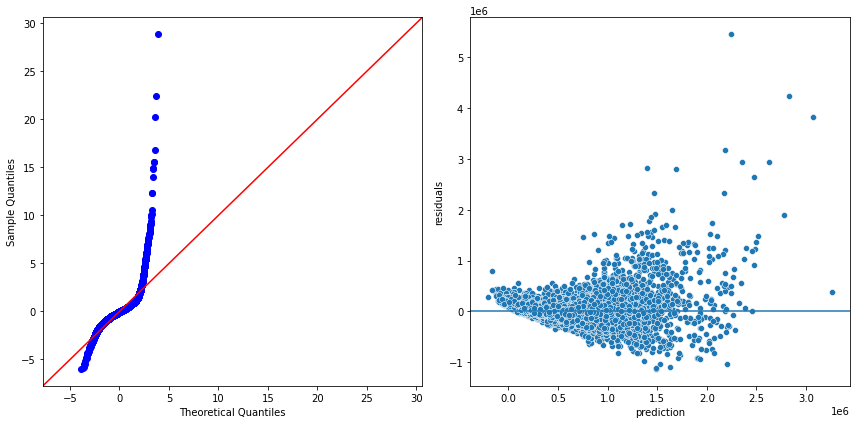

In [45]:
# new model

model3 = create_ols_model(house_data_model, target='price', plot_results=True)

This model failed to meet the normality and homoskedasticity assumptions of linear regression. This is evidenced by the
long upper tail of the qqplot and the heteroskedastic grouping of the residuals scatter plot.Removal of outliers might
help our model be better

## MODEL 4

In [46]:
# Remove outliers using the IQR method

def outliers_IQR(data):
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

In [47]:
# Determine target outliers

price_outliers = outliers_IQR(house_data_model['price'])
price_outliers.sum()

1158

In [48]:
#dataframe without outliers

house_data_model = house_data_model[~price_outliers].copy()
house_data_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,was_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,7.073270,8.639411,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,7.851661,8.887653,2.0,0.0,0.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,6.646391,9.210340,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,7.580700,8.517193,1.0,0.0,0.0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,7.426549,8.997147,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,7.333023,7.030857,3.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
21593,400000.0,4,2.50,7.745003,8.667852,2.0,0.0,0.0,3,0,...,1,0,0,0,0,0,0,0,0,0
21594,402101.0,2,0.75,6.927558,7.207860,2.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
21595,400000.0,3,2.50,7.377759,7.778211,2.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     976.6
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:11:35   Log-Likelihood:            -2.6336e+05
No. Observations:               20439   AIC:                         5.269e+05
Df Residuals:                   20360   BIC:                         5.275e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.056e+06   2.02e+04   -101.802      0.000    -2.1e+06   -2.02e+06
bedrooms      -1.322e+04    963.938    -13.711      0.000   -1.51e+04   -1.13e+04
bathrooms      1.788e+04   1546.493     11.561      0.000    1.48e+04    2.09e+04
sqft_living    2.546e+05   3075.193     82.777      0.000    2.49e+05    2.61e+05
sqft_lot       3.686e+04   1071.844     34.392      0.000    3.48e+04     3.9e+04
floors         2.744e+04   1666.889     16.464      0.000    2.42e+04    3.07e+04
waterfront     1.325e+05   1.44e+04      9.217      0.000    1.04e+05    1.61e+05
view           3.883e+04   1151.663     33.720      0.000    3.66e+04    4.11e+04
condition      1.584e+04   1118.169     14.168      0.000    1.37e+04     1.8e+04
was_renovated  3.015e+04   3942.681      7.647      0.000    2.24e+04    3.79e+04
zipcode_98002  9701.6751   8469.498      1.145      0.252   -6899.222    2.63e+04
zipcode_98003  1.268e+04   7620.584      1.665      0.096   -2252.215    2.76e+04
zipcode_98004  5.479e+05   9217.210     59.448      0.000     5.3e+05    5.66e+05
zipcode_98005  3.791e+05   9280.228     40.846      0.000    3.61e+05    3.97e+05
zipcode_98006  3.237e+05   6967.580     46.457      0.000     3.1e+05    3.37e+05
zipcode_98007  2.964e+05   9610.434     30.841      0.000    2.78e+05    3.15e+05
zipcode_98008  2.686e+05   7761.310     34.610      0.000    2.53e+05    2.84e+05
zipcode_98010  8.234e+04   1.09e+04      7.587      0.000    6.11e+04    1.04e+05
zipcode_98011  1.683e+05   8508.541     19.784      0.000    1.52e+05    1.85e+05
zipcode_98014  9.264e+04   1.01e+04      9.140      0.000    7.28e+04    1.13e+05
zipcode_98019  9.323e+04   8595.238     10.846      0.000    7.64e+04     1.1e+05
zipcode_98022 -4388.6579   8100.725     -0.542      0.588   -2.03e+04    1.15e+04
zipcode_98023  -222.3011   6619.524     -0.034      0.973   -1.32e+04    1.28e+04
zipcode_98024    1.4e+05   1.24e+04     11.332      0.000    1.16e+05    1.64e+05
zipcode_98027  2.188e+05   6986.879     31.310      0.000    2.05e+05    2.32e+05
zipcode_98028  1.494e+05   7612.461     19.624      0.000    1.34e+05    1.64e+05
zipcode_98029   2.75e+05   7445.590     36.937      0.000     2.6e+05     2.9e+05
zipcode_98030  1.153e+04   7816.515      1.475      0.140   -3792.008    2.68e+04
zipcode_98031  1.827e+04   7675.706      2.380      0.017    3220.805    3.33e+04
zipcode_98032  9051.0063   9935.360      0.911      0.362   -1.04e+04    2.85e+04
zipcode_98033  3.528e+05   7101.414     49.684      0.000    3.39e+05    3.67e+05
zipcode_98034  2.038e+05   6549.038     31.126      0.000    1.91e+05    2.17e+05
zipcode_98038  4.573e+04   6415.184      7.128      0.000    3.32e+04    5.83e+04
zipcode_98039  6.864e+05   3.94e+04     17.438      0.000    6.09e+05    7.64e+05
zipcode_98040  4.773e+05   9026.651     52.877   

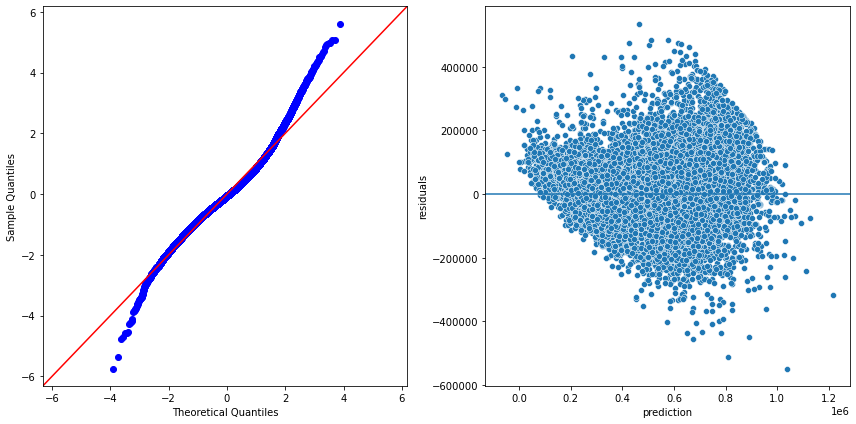

In [49]:
# new model

model4 = create_ols_model(house_data_model, target='price', plot_results=True)

## Model 5

In [50]:
# Remove outliers from 'sqft_lot' column due to high number of outliers in that feature

sqft_lot_outliers = outliers_IQR(house_data_model['sqft_lot'])
sqft_lot_outliers.sum()

2521

In [51]:
#Create new dataframe without outliers

house_data_model = house_data_model[~sqft_lot_outliers].copy()
house_data_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,was_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,7.073270,8.639411,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,7.851661,8.887653,2.0,0.0,0.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,6.646391,9.210340,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,7.580700,8.517193,1.0,0.0,0.0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,7.426549,8.997147,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21587,507250.0,3,2.50,7.727535,8.619027,2.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
21589,610685.0,4,2.50,7.832014,8.703341,2.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
21590,1010000.0,4,3.50,8.163371,8.881836,2.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
21593,400000.0,4,2.50,7.745003,8.667852,2.0,0.0,0.0,3,0,...,1,0,0,0,0,0,0,0,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     945.9
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:11:35   Log-Likelihood:            -2.3027e+05
No. Observations:               17918   AIC:                         4.607e+05
Df Residuals:                   17839   BIC:                         4.613e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.916e+06   2.43e+04    -78.719      0.000   -1.96e+06   -1.87e+06
bedrooms      -1.255e+04    989.040    -12.686      0.000   -1.45e+04   -1.06e+04
bathrooms       2.12e+04   1642.200     12.912      0.000     1.8e+04    2.44e+04
sqft_living    2.338e+05   3252.663     71.881      0.000    2.27e+05     2.4e+05
sqft_lot       3.513e+04   1871.622     18.768      0.000    3.15e+04    3.88e+04
floors         4.141e+04   1914.046     21.634      0.000    3.77e+04    4.52e+04
waterfront       1.5e+05   1.59e+04      9.432      0.000    1.19e+05    1.81e+05
view           4.325e+04   1207.393     35.824      0.000    4.09e+04    4.56e+04
condition      1.633e+04   1129.760     14.456      0.000    1.41e+04    1.85e+04
was_renovated  2.782e+04   4024.707      6.912      0.000    1.99e+04    3.57e+04
zipcode_98002  8643.7705   8330.663      1.038      0.299   -7685.137     2.5e+04
zipcode_98003  1.313e+04   7590.329      1.730      0.084   -1748.015     2.8e+04
zipcode_98004  5.546e+05   9122.327     60.801      0.000    5.37e+05    5.73e+05
zipcode_98005  3.754e+05   9779.585     38.391      0.000    3.56e+05    3.95e+05
zipcode_98006  3.303e+05   6972.410     47.378      0.000    3.17e+05    3.44e+05
zipcode_98007  2.913e+05   9536.636     30.543      0.000    2.73e+05     3.1e+05
zipcode_98008  2.716e+05   7730.621     35.134      0.000    2.56e+05    2.87e+05
zipcode_98010  8.939e+04    1.3e+04      6.876      0.000    6.39e+04    1.15e+05
zipcode_98011  1.695e+05   8443.033     20.072      0.000    1.53e+05    1.86e+05
zipcode_98014  9.566e+04   1.25e+04      7.655      0.000    7.12e+04     1.2e+05
zipcode_98019   8.97e+04   9020.359      9.944      0.000     7.2e+04    1.07e+05
zipcode_98022  5674.2469   8947.501      0.634      0.526   -1.19e+04    2.32e+04
zipcode_98023  2551.2821   6595.412      0.387      0.699   -1.04e+04    1.55e+04
zipcode_98024  1.467e+05   1.76e+04      8.315      0.000    1.12e+05    1.81e+05
zipcode_98027  2.793e+05   8040.597     34.739      0.000    2.64e+05    2.95e+05
zipcode_98028  1.525e+05   7614.700     20.027      0.000    1.38e+05    1.67e+05
zipcode_98029  2.738e+05   7559.592     36.222      0.000    2.59e+05    2.89e+05
zipcode_98030   1.11e+04   7780.993      1.426      0.154   -4153.469    2.63e+04
zipcode_98031  1.731e+04   7655.021      2.261      0.024    2301.991    3.23e+04
zipcode_98032  1.342e+04   9781.610      1.372      0.170   -5748.292    3.26e+04
zipcode_98033  3.491e+05   7071.381     49.375      0.000    3.35e+05    3.63e+05
zipcode_98034  2.043e+05   6521.974     31.320      0.000    1.91e+05    2.17e+05
zipcode_98038  3.856e+04   6579.739      5.861      0.000    2.57e+04    5.15e+04
zipcode_98039  6.914e+05   3.81e+04     18.143      0.000    6.17e+05    7.66e+05
zipcode_98040  4.832e+05   8883.378     54.396   

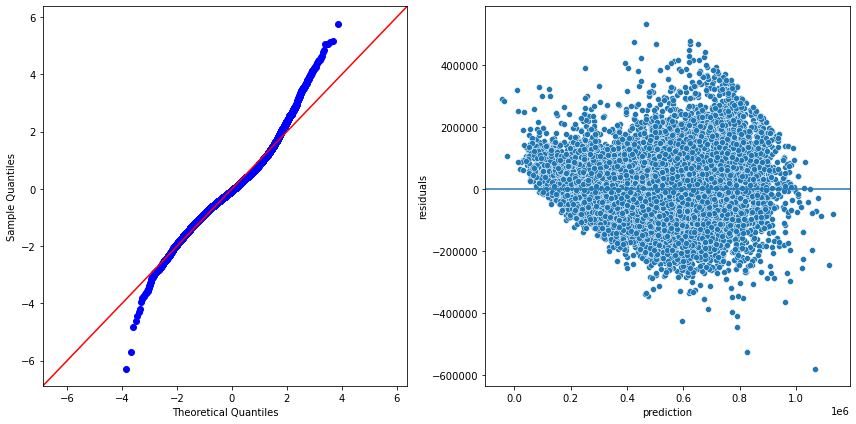

In [52]:
# Create new model using new dataframe

model5 = create_ols_model(house_data_model, target='price', plot_results=True)

## Model 6

In [53]:
# Remove outliers from 'bedrooms' column due to high number of outliers in that feature

bedroom_outliers = outliers_IQR(house_data_model['bedrooms'])
bedroom_outliers.sum()

412

In [54]:
#Create new dataframe without outliers

house_data_model = house_data_model[~bedroom_outliers].copy()
house_data_model

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,was_renovated,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,7.073270,8.639411,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,7.851661,8.887653,2.0,0.0,0.0,3,1,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,6.646391,9.210340,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,7.580700,8.517193,1.0,0.0,0.0,5,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,7.426549,8.997147,1.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21587,507250.0,3,2.50,7.727535,8.619027,2.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
21589,610685.0,4,2.50,7.832014,8.703341,2.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
21590,1010000.0,4,3.50,8.163371,8.881836,2.0,0.0,0.0,3,0,...,0,0,0,0,0,0,0,0,0,0
21593,400000.0,4,2.50,7.745003,8.667852,2.0,0.0,0.0,3,0,...,1,0,0,0,0,0,0,0,0,0


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     934.9
Date:                Fri, 01 Jul 2022   Prob (F-statistic):               0.00
Time:                        16:11:36   Log-Likelihood:            -2.2485e+05
No. Observations:               17506   AIC:                         4.499e+05
Df Residuals:                   17427   BIC:                         4.505e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -1.93e+06   2.47e+04    -78.024      0.000   -1.98e+06   -1.88e+06
bedrooms      -1.126e+04   1159.983     -9.709      0.000   -1.35e+04   -8988.455
bathrooms        2.3e+04   1686.580     13.637      0.000    1.97e+04    2.63e+04
sqft_living    2.347e+05   3362.159     69.817      0.000    2.28e+05    2.41e+05
sqft_lot       3.521e+04   1886.761     18.662      0.000    3.15e+04    3.89e+04
floors         4.033e+04   1926.534     20.932      0.000    3.65e+04    4.41e+04
waterfront     1.485e+05   1.61e+04      9.200      0.000    1.17e+05     1.8e+05
view             4.3e+04   1220.048     35.242      0.000    4.06e+04    4.54e+04
condition      1.629e+04   1137.746     14.319      0.000    1.41e+04    1.85e+04
was_renovated   2.79e+04   4091.091      6.819      0.000    1.99e+04    3.59e+04
zipcode_98002  1.137e+04   8436.171      1.348      0.178   -5166.403    2.79e+04
zipcode_98003  1.476e+04   7589.228      1.945      0.052    -111.692    2.96e+04
zipcode_98004  5.541e+05   9090.397     60.958      0.000    5.36e+05    5.72e+05
zipcode_98005  3.744e+05   9806.054     38.183      0.000    3.55e+05    3.94e+05
zipcode_98006  3.272e+05   6976.486     46.902      0.000    3.14e+05    3.41e+05
zipcode_98007  2.893e+05   9693.189     29.845      0.000     2.7e+05    3.08e+05
zipcode_98008  2.711e+05   7747.572     34.990      0.000    2.56e+05    2.86e+05
zipcode_98010  8.553e+04    1.3e+04      6.575      0.000       6e+04    1.11e+05
zipcode_98011  1.685e+05   8453.183     19.930      0.000    1.52e+05    1.85e+05
zipcode_98014  8.982e+04   1.27e+04      7.050      0.000    6.48e+04    1.15e+05
zipcode_98019  8.938e+04   9008.321      9.922      0.000    7.17e+04    1.07e+05
zipcode_98022  4274.8404   8970.808      0.477      0.634   -1.33e+04    2.19e+04
zipcode_98023  2319.6294   6567.640      0.353      0.724   -1.06e+04    1.52e+04
zipcode_98024  1.473e+05   1.75e+04      8.406      0.000    1.13e+05    1.82e+05
zipcode_98027  2.789e+05   8008.094     34.829      0.000    2.63e+05    2.95e+05
zipcode_98028  1.522e+05   7582.289     20.076      0.000    1.37e+05    1.67e+05
zipcode_98029  2.731e+05   7521.874     36.310      0.000    2.58e+05    2.88e+05
zipcode_98030  1.174e+04   7775.446      1.509      0.131   -3503.625     2.7e+04
zipcode_98031  1.734e+04   7622.178      2.274      0.023    2394.849    3.23e+04
zipcode_98032  1.426e+04   9780.277      1.458      0.145   -4912.269    3.34e+04
zipcode_98033  3.493e+05   7070.160     49.410      0.000    3.35e+05    3.63e+05
zipcode_98034  2.047e+05   6511.643     31.443      0.000    1.92e+05    2.18e+05
zipcode_98038  3.801e+04   6552.552      5.800      0.000    2.52e+04    5.08e+04
zipcode_98039  6.924e+05   3.78e+04     18.302      0.000    6.18e+05    7.67e+05
zipcode_98040  4.835e+05   8942.132     54.068   

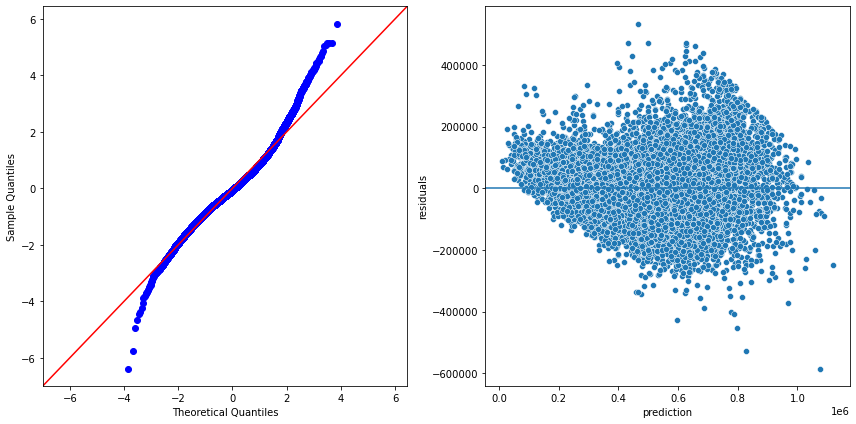

In [55]:
# Create new model using new dataframe

model6 = create_ols_model(house_data_model, target='price', plot_results=True)



Based on the adjusted R squared value of 0.807 meaning that 80% of the variability in price is explained by the variables. and the large F statistic, I can conclude that the correlation between the model and dependent variable is statistically significant, and can be used as a tool to help predict housing prices, and more importantly, identify home characteristics that affect home sale price. The final model is also notably better than the baseline model, with a higher R squared and more adherence to the normality and homoskedasticity assumptions. While the model is not perfect, I believe it could be generalized beyond the current data effectively with data from similar counties to King County, and that it would benefit any homeowner in similar areas.

In [62]:
# coefficients for each feature

pd.set_option('display.max_rows', None)
coeffs = model6.params.sort_values().to_frame('Coefficients')
coeffs['Absolute Value'] = coeffs['Coefficients'].abs()
coeffs.sort_values('Absolute Value',ascending=False,inplace=True)
coeffs.round(2)

,Coefficients,Absolute Value
const,-1930020.65,1930020.65
zipcode_98039,692397.73,692397.73
zipcode_98004,554135.27,554135.27
zipcode_98102,512277.25,512277.25
zipcode_98112,492667.39,492667.39
zipcode_98109,490865.42,490865.42
zipcode_98040,483486.03,483486.03
zipcode_98119,470422.30,470422.30
zipcode_98105,428327.14,428327.14
zipcode_98199,419080.64,419080.64


The coefficents above describe the impact each feature has on home sale price. Notably, the three features with the 
 positive coefficents, that the homeowner can control, are was_renovated, floors,bathrooms and condition. 
Similarly, bedrooms was a feature with a large negative coefficient.

# visualizations

### Was renovated  vs price analysis

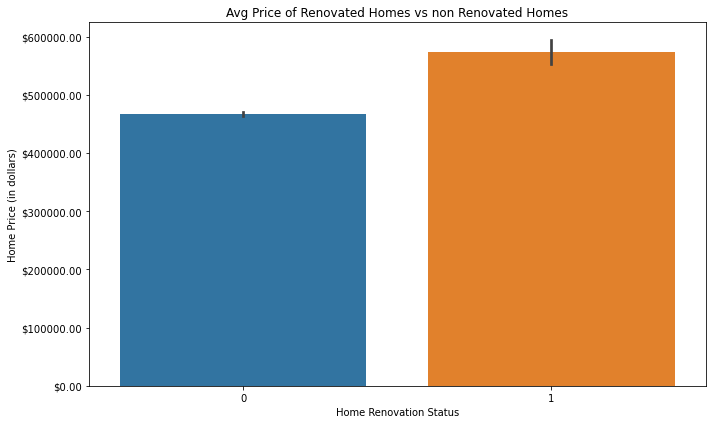

In [57]:
# Create plot

fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(ax=ax, 
            x='was_renovated', 
            y='price', 
            data=house_data_model)
ax.set_xlabel('Home Renovation Status')
ax.set_ylabel('Home Price (in dollars)')
ax.set_title('Avg Price of Renovated Homes vs non Renovated Homes')
ax.yaxis.set_major_formatter('${x:1.2f}')

plt.tight_layout()

plt.savefig

plt.show()

As per the figure above the price of renovated housed are higher than the prices of non renovated houses.A renovated house will 
lead to an increase of price by $27897.36.

### condition vs price analysis

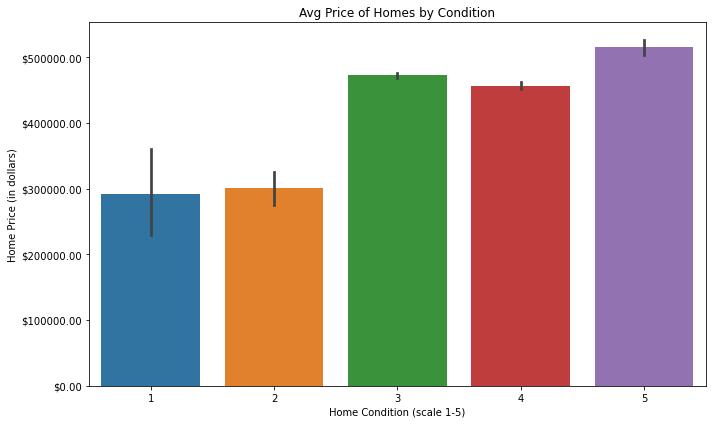

In [58]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(ax=ax, 
            x='condition', 
            y='price', 
            data=house_data_model)
ax.set_xlabel('Home Condition (scale 1-5)')
ax.set_ylabel('Home Price (in dollars)')
ax.set_title('Avg Price of Homes by Condition')
ax.yaxis.set_major_formatter('${x:1.2f}')

plt.tight_layout()

plt.savefig

plt.show()

 increasing the condition of a home by one level on a scale from 1-5, could result in an increase in home price of over $15000.

### Bathrooms vs home price analysis

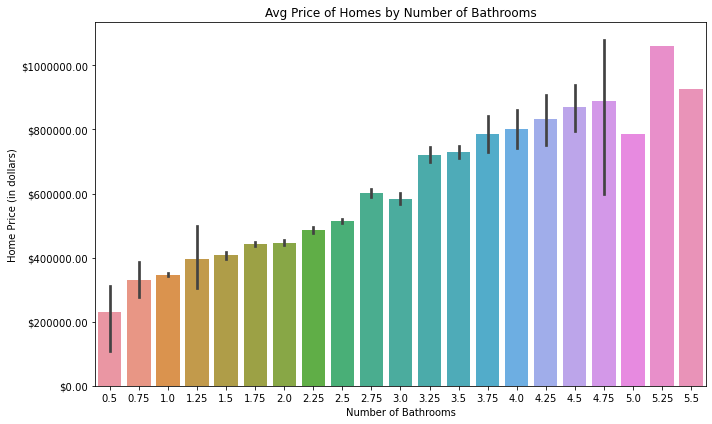

In [59]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(ax=ax, 
            x='bathrooms', 
            y='price', 
            data=house_data_model)
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Home Price (in dollars)')
ax.set_title('Avg Price of Homes by Number of Bathrooms')
ax.yaxis.set_major_formatter('${x:1.2f}')

plt.tight_layout()

plt.savefig

plt.show()

With a positive coefficient of 22999.71, increasing the number of bathrooms in a home by one could result in increasing the
sale price of the home by over $20,000

### Floors vs home price analysis

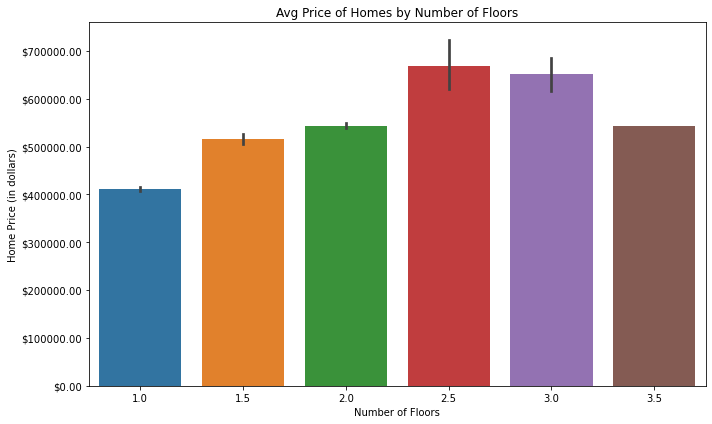

In [60]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(ax=ax, 
            x='floors', 
            y='price', 
            data=house_data_model)
ax.set_xlabel('Number of Floors')
ax.set_ylabel('Home Price (in dollars)')
ax.set_title('Avg Price of Homes by Number of Floors')
ax.yaxis.set_major_formatter('${x:1.2f}')

plt.tight_layout()

plt.savefig
plt.show()

With a positive coefficient of 40326.13, increasing the number of floors in a home by one could result in increasing the sale price of the home by over $40,000

# Conclusion and recommendation

- Home renovation. As evidenced by a positive coefficient of 27897.36,means that renovating a home could result in an 
increase in home price of over $20,000. Based on the results, I would recommend that homeowners should renovate their homes.

- Home condition has a positive coefficient of 16290.82, increasing the condition of a home by one level on a scale from 1-5,
could result in an increase in home price of over $10,000. Condition is defined by King County as an index from 1 to 5 based
on the overall condition of the home. Homeowners should focus on improving the condition of the home, potentially by 
replacing appliances and features of the home.

- Home bathrooms. Evidenced by a positive coefficient of 22999.71, increasing the number of bathrooms in a home by one 
could result in an increase in home price of over $20,000. Homeowners should consider adding bathrooms as a tangible way 
of increasing their homes sale price.

- Home Floors. Represented by a coefficient of 40326.13, adding floors to a home could potentially have a positive impact
on sale price.home owners should consider adding more floors to increase their home sale price.
 

In conclusion,the model can be made more perfect by acquiring more data on other features related to housing that could help 
better predict home prices.